<a href="https://colab.research.google.com/github/Kelvinfabio/Kelvinfabio/blob/main/Pneumonia_Covid_Detection_UsingDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import os
import pathlib
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import random
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPool2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
os.environ['KAGGLE_USERNAME'] = 'kelvinfabio'
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
os.environ['KAGGLE_KEY'] = '76347d318211472a41e6cc55b115b302'


In [3]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

Dataset URL: https://www.kaggle.com/datasets/sid321axn/covid-cxr-image-dataset-research
License(s): CC0-1.0
 98% 561M/572M [00:08<00:00, 33.3MB/s]
100% 572M/572M [00:08<00:00, 67.5MB/s]


In [6]:
z = zipfile.ZipFile('covid-cxr-image-dataset-research.zip')
z.extractall()

In [11]:
for dirpath, dirname, filename in os.walk("/content/COVID_IEEE"):
  print(f"there are {len(dirname)} directory and {len(filename)} image {dirpath}")

there are 3 directory and 0 image /content/COVID_IEEE
there are 0 directory and 619 image /content/COVID_IEEE/virus
there are 0 directory and 668 image /content/COVID_IEEE/normal
there are 0 directory and 536 image /content/COVID_IEEE/covid


In [14]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_name = np.array([sorted([item.name for item in data_dir.glob("*")])])
class_name

array([['covid', 'normal', 'virus']], dtype='<U6')

In [17]:
def view_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img,cmap="gray")
  plt.title(target_class)
  plt.axis("off")

  return img

['person1653_virus_2859.jpeg']


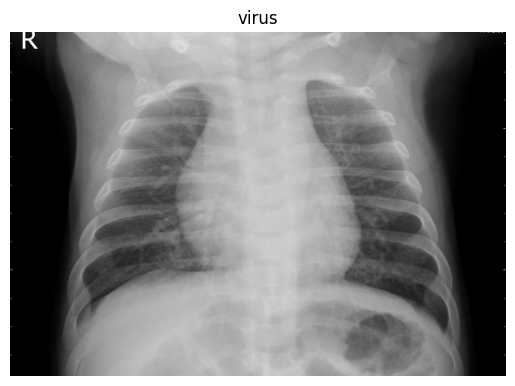

In [19]:
img = view_image("/content/COVID_IEEE/",'virus')

['IM-0273-0001.jpeg']


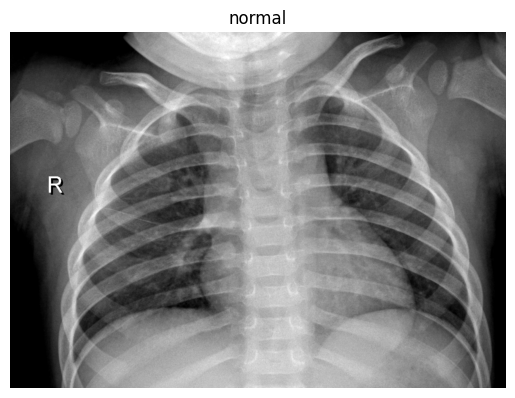

In [20]:
img = view_image("/content/COVID_IEEE/",'normal')

['all14238-fig-0001-m-b.jpg']


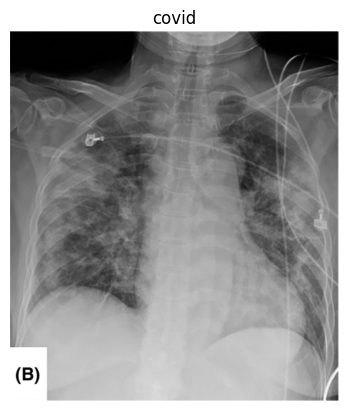

In [21]:
img = view_image("/content/COVID_IEEE/",'covid')

In [30]:
data = []
labels = []

covid = os.listdir("/content/COVID_IEEE/covid")
for i in covid:
  # Add '/' between 'covid' and 'i' to construct the correct file path
  image = cv2.imread("/content/COVID_IEEE/covid/"+i)
  if image is not None: # Check if image was loaded successfully
    image = cv2.resize(image, (224,224))
    data.append(image) # Append the image, not the data list
    labels.append(0)
  else:
    print(f"Failed to load image: /content/COVID_IEEE/covid/{i}")

In [31]:

normal = os.listdir("/content/COVID_IEEE/normal")
for i in normal:
  # Add '/' between 'covid' and 'i' to construct the correct file path
  image = cv2.imread("/content/COVID_IEEE/normal/"+i)
  if image is not None: # Check if image was loaded successfully
    image = cv2.resize(image, (224,224))
    data.append(image) # Append the image, not the data list
    labels.append(1)
  else:
    print(f"Failed to load image: /content/COVID_IEEE/normal/{i}")

In [32]:
virus = os.listdir("/content/COVID_IEEE/virus")
for i in virus:
  # Add '/' between 'covid' and 'i' to construct the correct file path
  image = cv2.imread("/content/COVID_IEEE/virus/"+i)
  if image is not None: # Check if image was loaded successfully
    image = cv2.resize(image, (224,224))
    data.append(image) # Append the image, not the data list
    labels.append(2)
  else:
    print(f"Failed to load image: /content/COVID_IEEE/virus/{i}")

In [33]:
data = np.array(data)/255.0
img_labels = np.array(labels)

In [34]:
data.shape

(1823, 224, 224, 3)

In [45]:
img_labels.shape

(1823,)

In [41]:
x_train,x_test, y_train,y_test = train_test_split(data, img_labels, test_size=0.20,random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [42]:
model = Sequential()

model.add(Conv2D(input_shape = (224,224,3), filters = 32, kernel_size = (3,3), padding = "same"))
model.add(Activation("relu"))

model.add(Conv2D(filters = 32, padding = "same", kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(filters = 64, padding = "same", kernel_size = (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters = 64, padding = "same", kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(filters = 128, padding = "same", kernel_size = (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters = 128, padding = "same", kernel_size = (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation = "relu"))
model.add(Dense(units = 256, activation = "relu"))

model.add(Dense(units = 3, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      18496     
                                                      

In [44]:
model.fit(x_train,y_train, validation_split= 0.3, epochs = 15, batch_size = 32)

Epoch 1/15
32/32 [==============================] - 375s 12s/step - loss: 0.7889 - accuracy: 0.6353 - val_loss: 0.4273 - val_accuracy: 0.8082
Epoch 2/15
32/32 [==============================] - 364s 11s/step - loss: 0.5182 - accuracy: 0.8147 - val_loss: 0.4849 - val_accuracy: 0.8151
Epoch 3/15
32/32 [==============================] - 369s 12s/step - loss: 0.3460 - accuracy: 0.8922 - val_loss: 0.3703 - val_accuracy: 0.8653
Epoch 4/15
32/32 [==============================] - 363s 11s/step - loss: 0.2362 - accuracy: 0.9225 - val_loss: 0.2417 - val_accuracy: 0.9064
Epoch 5/15
32/32 [==============================] - 365s 11s/step - loss: 0.2303 - accuracy: 0.9137 - val_loss: 0.2423 - val_accuracy: 0.9269
Epoch 6/15
32/32 [==============================] - 369s 12s/step - loss: 0.1676 - accuracy: 0.9422 - val_loss: 0.1969 - val_accuracy: 0.9315
Epoch 7/15
32/32 [==============================] - 365s 11s/step - loss: 0.1152 - accuracy: 0.9559 - val_loss: 0.1783 - val_accuracy: 0.9475
Epoch 

Text(0.5, 1.0, 'Training-Validation Accuracy')

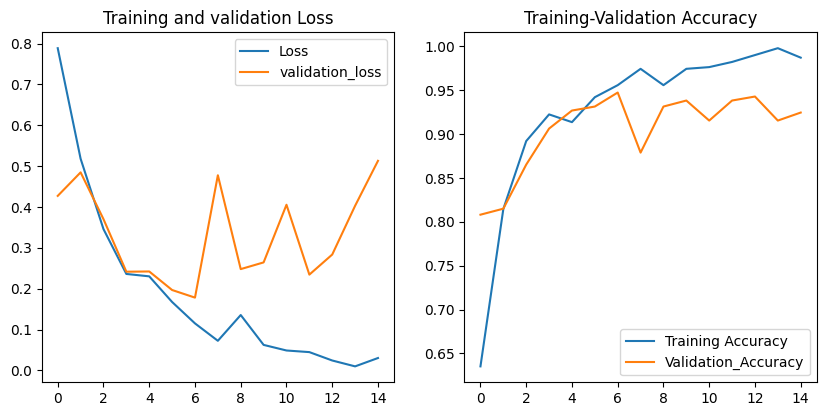

In [46]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss['loss'], label='Loss')
plt.plot(loss['val_loss'], label = 'validation_loss')
plt.legend()
plt.title('Training and validation Loss')

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label = 'Validation_Accuracy')
plt.legend()
plt.title('Training-Validation Accuracy')

In [47]:
best_score = max(model.history.history['val_accuracy'])
print(f"Best Validation score is: {best_score:.2f}")

Best Validation score is: 0.95


In [49]:
predictions = model.predict(x_test)

y_pred = np.argmax(predictions, axis=1)
y_test_new = np.argmax(y_test, axis=1)

12/12 [==============================] - 32s 3s/step


In [52]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       108
           1       0.93      0.87      0.90       129
           2       0.93      0.90      0.92       128

    accuracy                           0.92       365
   macro avg       0.92      0.92      0.92       365
weighted avg       0.92      0.92      0.91       365



In [54]:
print(confusion_matrix(y_test_new, y_pred))

[[107   0   1]
 [ 10 112   7]
 [  5   8 115]]


In [61]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), index = ['covid','normal','virus'])

,0,1,2
covid,107,0,1
normal,10,112,7
virus,5,8,115


In [62]:
base_model = tf.keras.applications.MobileNet(input_shape = [224,224,3], weights = "imagenet", include_top=False)
for layer in base_model.layers:
  layer.trainable = False

17225924/17225924 [==============================] - 0s 0us/step


In [64]:
model = Flatten()(base_model.output)

model = Dense(units = 1024, activation = "relu")(model)
model = Dense(units = 512, activation = "relu")(model)
model = Dense(units = 256, activation = "relu")(model)

prediction_layer = Dense(units = 3, activation = "softmax")(model)


In [67]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [68]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [69]:
model.fit(x_train,y_train, validation_split= 0.3, epochs = 15, batch_size = 32)

Epoch 1/15
32/32 [==============================] - 101s 3s/step - loss: 6.3865 - accuracy: 0.7765 - val_loss: 1.0541 - val_accuracy: 0.9338
Epoch 2/15
32/32 [==============================] - 92s 3s/step - loss: 0.5638 - accuracy: 0.9637 - val_loss: 0.6958 - val_accuracy: 0.9247
Epoch 3/15
32/32 [==============================] - 90s 3s/step - loss: 0.1672 - accuracy: 0.9824 - val_loss: 0.5687 - val_accuracy: 0.9361
Epoch 4/15
32/32 [==============================] - 92s 3s/step - loss: 0.0814 - accuracy: 0.9873 - val_loss: 0.8735 - val_accuracy: 0.9384
Epoch 5/15
32/32 [==============================] - 89s 3s/step - loss: 0.0220 - accuracy: 0.9961 - val_loss: 1.5641 - val_accuracy: 0.9201
Epoch 6/15
32/32 [==============================] - 93s 3s/step - loss: 0.4103 - accuracy: 0.9706 - val_loss: 1.3250 - val_accuracy: 0.9155
Epoch 7/15
32/32 [==============================] - 90s 3s/step - loss: 0.1005 - accuracy: 0.9902 - val_loss: 1.5393 - val_accuracy: 0.9224
Epoch 8/15
32/32 [=

Text(0.5, 1.0, 'Training-Validation Accuracy')

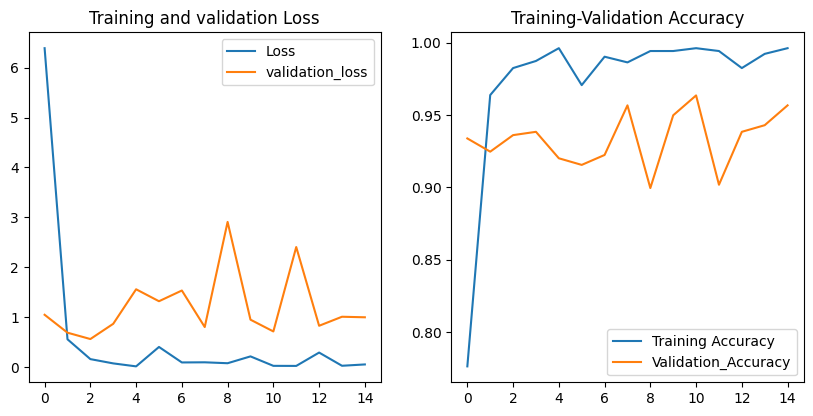

In [70]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss['loss'], label='Loss')
plt.plot(loss['val_loss'], label = 'validation_loss')
plt.legend()
plt.title('Training and validation Loss')

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label = 'Validation_Accuracy')
plt.legend()
plt.title('Training-Validation Accuracy')

In [71]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       108
           1       0.93      0.87      0.90       129
           2       0.93      0.90      0.92       128

    accuracy                           0.92       365
   macro avg       0.92      0.92      0.92       365
weighted avg       0.92      0.92      0.91       365



In [72]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), index = ['covid','normal','virus'])

,0,1,2
covid,107,0,1
normal,10,112,7
virus,5,8,115
